In [69]:
import pickle
import numpy as np
import seaborn as sns
import pandas as pd

from gie import GosInE
from simulation_util import *

from load_data import *

In [92]:
def load_regrets(delta, high, low, n = 20, k = 50, iters = 10, root_dir="../data/alpha_100/alpha"):
    regrets = []
    t = 100000
    alphas = [1, 2, 3, 4, 5, 6]
    
    for alpha in alphas:
        for i in range(iters):
            ucb = pickle.load(open(f"{root_dir}/ucb_{t}_{k}_{n}_{delta:.2f}_{high:.2f}_{low:.2f}_{alpha:.2f}_{i}.p", "rb"))
            klucb = pickle.load(open(f"{root_dir}/klucb_{t}_{k}_{n}_{delta:.2f}_{high:.2f}_{low:.2f}_{alpha:.2f}_{i}.p", "rb"))

            regrets.append([alpha, "UCB", ucb.average_regret()[-1]])
            regrets.append([alpha, "KL-UCB", klucb.average_regret()[-1]])
        
    return regrets
    

In [73]:
def plot_results(delta, high, low, n = n, k = k):
    alphas = [0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 6]
    # Load data
    for i in range(100):
        
        (ucb_reg, klucb_reg) = load_data(delta=delta, high=high, low=low, alpha = alpha, n = n, k = k, root_dir="../data/alpha_results2")
    
    # Average Results
    ucb_avg_cum_reg = average_results([ucb.average_regret() for ucb in ucb_data])
    klucb_avg_cum_reg = average_results([klucb.average_regret() for klucb in klucb_data])

    # Plot Data
    #plt.plot(ucb_avg_cum_reg, color="r", label="UCB")
    #plt.plot(klucb_avg_cum_reg, color="g", label="KL-UCB")
    #plt.xlabel("Time")
    #plt.ylabel("Regret")
    #plt.legend()
    #plt.show()

NameError: name 'n' is not defined

In [93]:
def plot_alphas(delta, high, low, n, k):
    alphas = [0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 6]
    
    regrets = load_regrets(delta, high, low, n, k, iters = 100)
    
    #df = pd.DataFrame(["Alpha", "UCB-Type", "Regret"])
    
    #for alpha in alphas:
        # Load data
 #       (ucb_reg, klucb_reg) = load_data(delta=delta, high=high, low=low, alpha = alpha, n = n, k = k, iters = 20, root_dir="../data/alpha_results2")
#        
  #      for ucb in ucb_data:
   #         regrets.append([alpha, "UCB", ucb.average_regret()[-1]])
    #        #best_mean = ucb.arms.max_mean()
            #for node in ucb.nodes:
            #    regrets.append([alpha, "UCB", node.regret(best_mean)[-1]])
            
     #   for klucb in klucb_data:
      #      regrets.append([alpha, "KL-UCB", klucb.average_regret()[-1]])
            #for node in klucb.nodes:
            #    regrets.append([alpha, "KL-UCB", node.regret(best_mean)[-1]])
            

    df = pd.DataFrame(regrets, columns = ["Alpha", "UCB-Type", "Regret"])
    #print(df)
    g = sns.lineplot(data = df, x = "Alpha", y = "Regret", hue = "UCB-Type", markers = True, err_style="bars", ci = 95)
    g.legend_.set_title(None)
    g.set(xlabel = r"$\alpha$")
        
    # Plot Data
    #plt.plot(alphas, ucb_regrets, "ro", color="r", label="UCB")
    #plt.plot(alphas, klucb_regrets, "ro", color="g", label="KL-UCB")
    #plt.xlabel(r"$\alpha$")
    #plt.ylabel("Regret")
    #plt.legend()
    #plt.show()
    

In [16]:
plot_results(0.1, 0.9, 0.3, alpha = 0.75)

NameError: name 'n' is not defined

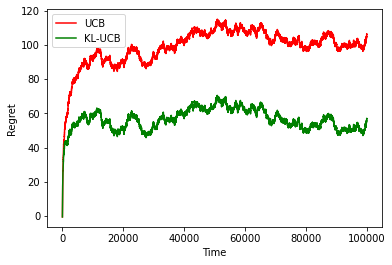

In [21]:
plot_results(0.1, 0.9, 0.3, alpha = 0.5)

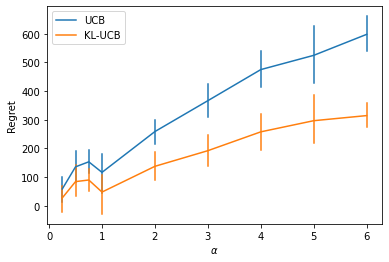

In [85]:
plot_alphas(0.1, 0.9, 0.2, 5, 20)

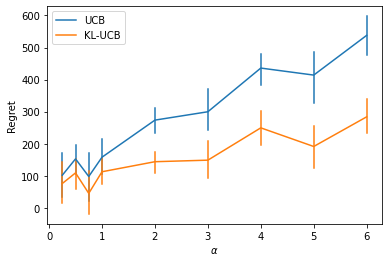

In [82]:
plot_alphas(0.1, 0.9, 0.2, 10, 30)

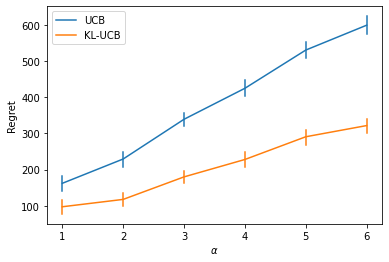

In [94]:
plot_alphas(0.1, 0.9, 0.2, 20, 50)